In [34]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import cifar10
import os
import numpy as np
import matplotlib.pyplot as plt

os.environ['TFF_CPP_MIN_LOG_LEVEL'] = '2'



In [35]:
(train_img, train_labels), (test_img, test_labels) = cifar10.load_data()


In [36]:
print(train_img.shape, train_labels.shape)
print(test_img.shape, test_labels.shape)

(50000, 32, 32, 3) (50000, 1)
(10000, 32, 32, 3) (10000, 1)


In [37]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']


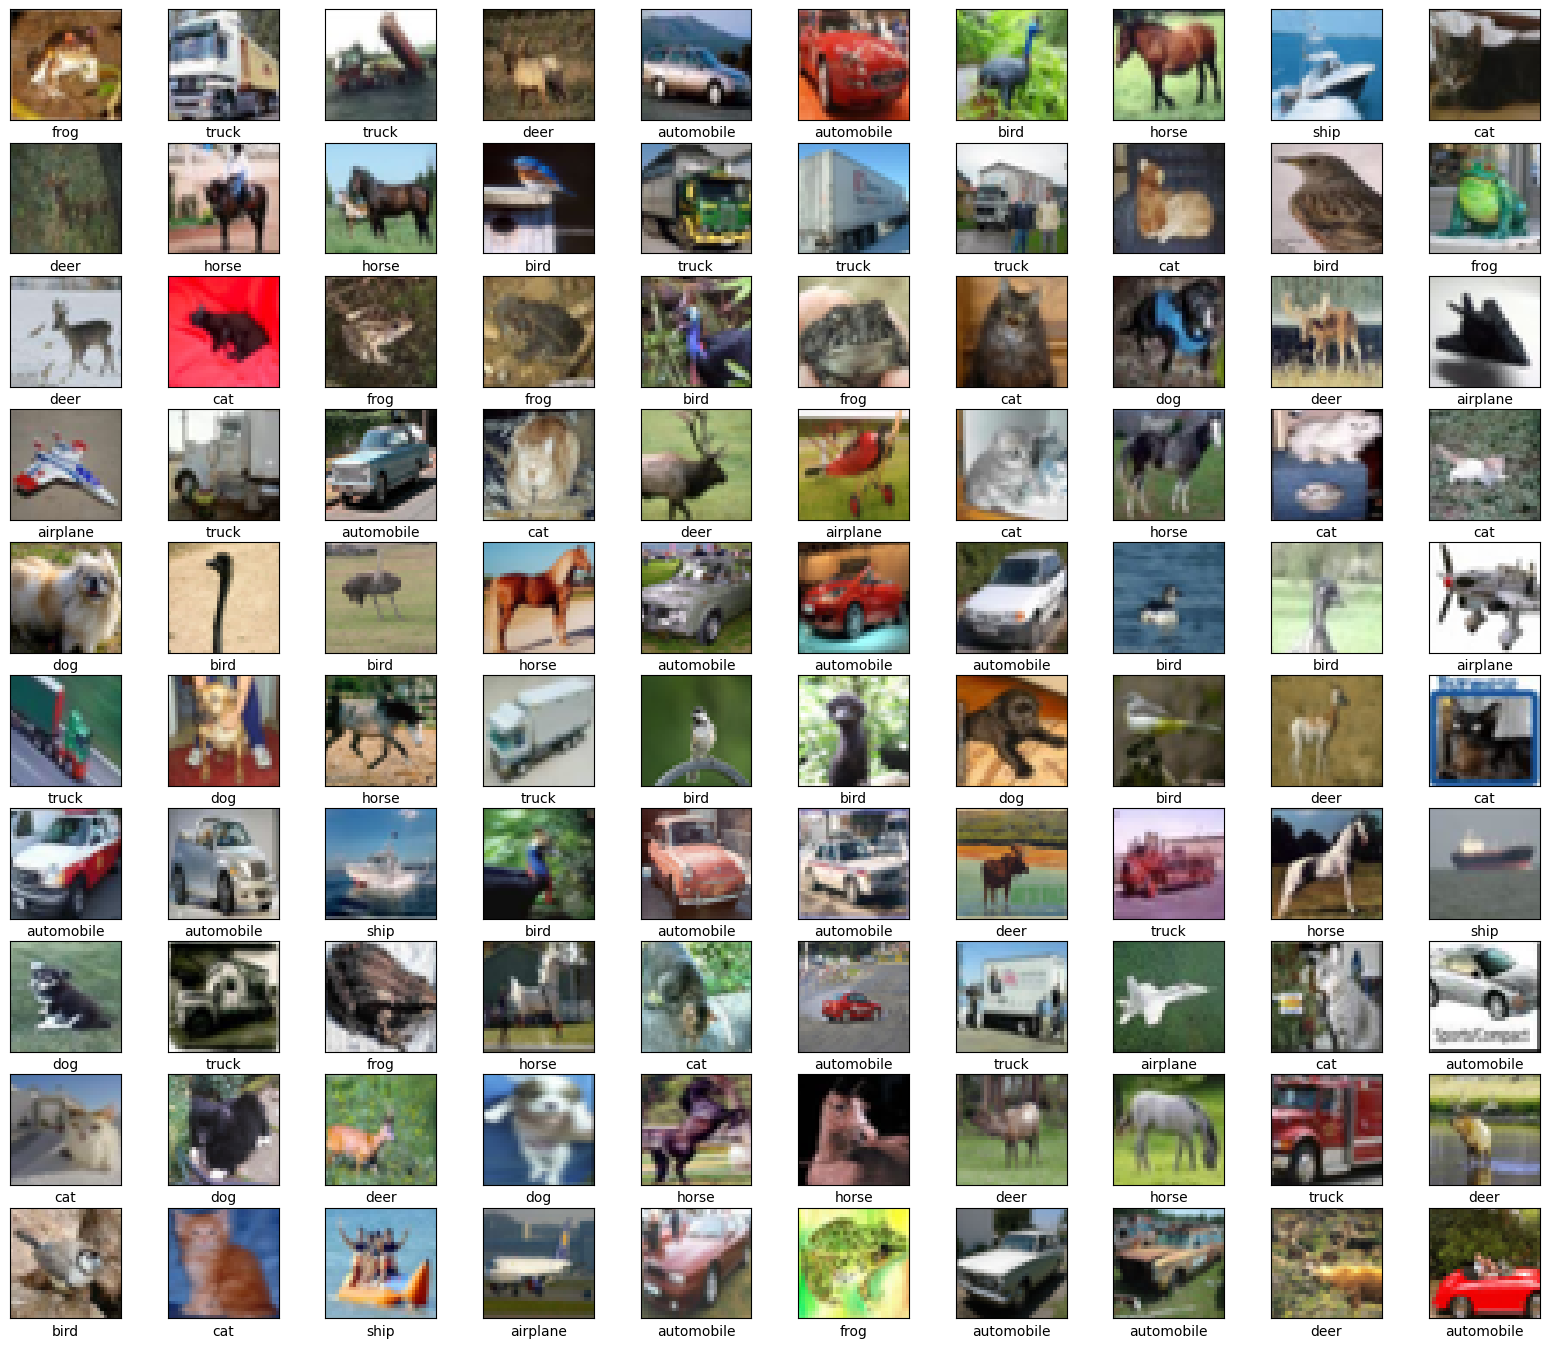

In [38]:
plt.figure(figsize=(20,17))
for i in range (100):
  plt.subplot(10,10,i+1)
  plt.imshow(train_img[i])
  plt.xticks([])
  plt.yticks([])
  plt.xlabel(class_names[train_labels[i][0]])
plt.show()


In [39]:
train_img,test_img =train_img/255.0 ,test_img/255.0



In [40]:
model = keras.Sequential([
    keras.Input(shape=(32,32,3)),

    layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu' ,padding='same'),
    layers.MaxPooling2D(pool_size=(2,2)),

    layers.Conv2D(filters=16, kernel_size=(3,3), activation='relu',padding='same'),
    layers.MaxPooling2D(pool_size=(2,2)),

    #layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu',padding='same'),
    #layers.MaxPooling2D(pool_size=(2,2)),


    layers.Flatten(),
    layers.Dense(64, activation='relu'),

    layers.Dense(10, activation='softmax')
])
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 32, 32, 32)        896       
                                                                 
 max_pooling2d_12 (MaxPooli  (None, 16, 16, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_13 (Conv2D)          (None, 16, 16, 16)        4624      
                                                                 
 max_pooling2d_13 (MaxPooli  (None, 8, 8, 16)          0         
 ng2D)                                                           
                                                                 
 flatten_6 (Flatten)         (None, 1024)              0         
                                                                 
 dense_12 (Dense)            (None, 64)               

In [41]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [42]:
h1 = model.fit(x=train_img, y=train_labels, epochs=30, validation_split=0.3, batch_size=256)

Epoch 1/30
137/137 [==============================] - 3s 14ms/step - loss: 1.8472 - accuracy: 0.3320 - val_loss: 1.6039 - val_accuracy: 0.4299
Epoch 2/30
137/137 [==============================] - 1s 8ms/step - loss: 1.4935 - accuracy: 0.4632 - val_loss: 1.4182 - val_accuracy: 0.4901
Epoch 3/30
137/137 [==============================] - 1s 9ms/step - loss: 1.3633 - accuracy: 0.5171 - val_loss: 1.3419 - val_accuracy: 0.5238
Epoch 4/30
137/137 [==============================] - 1s 8ms/step - loss: 1.2804 - accuracy: 0.5485 - val_loss: 1.2993 - val_accuracy: 0.5482
Epoch 5/30
137/137 [==============================] - 1s 9ms/step - loss: 1.2182 - accuracy: 0.5713 - val_loss: 1.2430 - val_accuracy: 0.5655
Epoch 6/30
137/137 [==============================] - 1s 10ms/step - loss: 1.1746 - accuracy: 0.5886 - val_loss: 1.1961 - val_accuracy: 0.5861
Epoch 7/30
137/137 [==============================] - 1s 10ms/step - loss: 1.1240 - accuracy: 0.6080 - val_loss: 1.1643 - val_accuracy: 0.5955
Epo

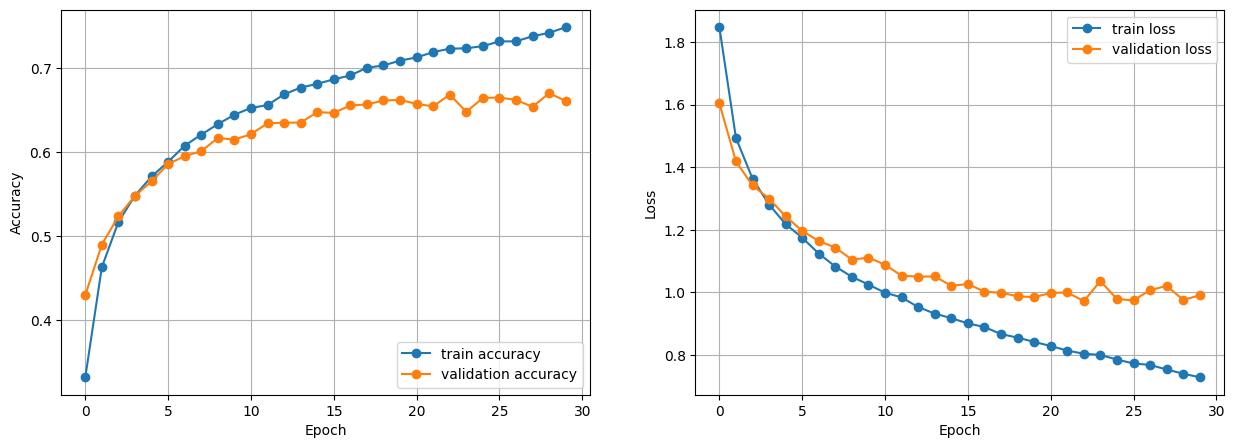

In [43]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(h1.history['accuracy'], 'o-', label='train accuracy')
plt.plot(h1.history['val_accuracy'], 'o-', label = 'validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend(loc='lower right')

plt.subplot(1,2,2)
plt.plot(h1.history['loss'], 'o-', label='train loss')
plt.plot(h1.history['val_loss'], 'o-', label='validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)
plt.legend(loc='upper right')

plt.show()  #overfitting

In [44]:
test_loss, test_acc = model.evaluate(test_img, test_labels)
print('\nTest Accuracy:', test_acc)
print('\nTest Loss:', test_loss)



313/313 [==============================] - 1s 3ms/step - loss: 0.9788 - accuracy: 0.6690

Test Accuracy: 0.6690000295639038

Test Loss: 0.9787984490394592


In [45]:
predictions = model.predict(train_img)


1563/1563 [==============================] - 4s 2ms/step


In [46]:
predictions[0]

array([1.4120468e-04, 1.7159674e-04, 3.6532830e-03, 3.2870762e-02,
       2.7688663e-03, 2.2918286e-02, 9.3678206e-01, 6.7653932e-04,
       8.1590888e-06, 9.2104337e-06], dtype=float32)

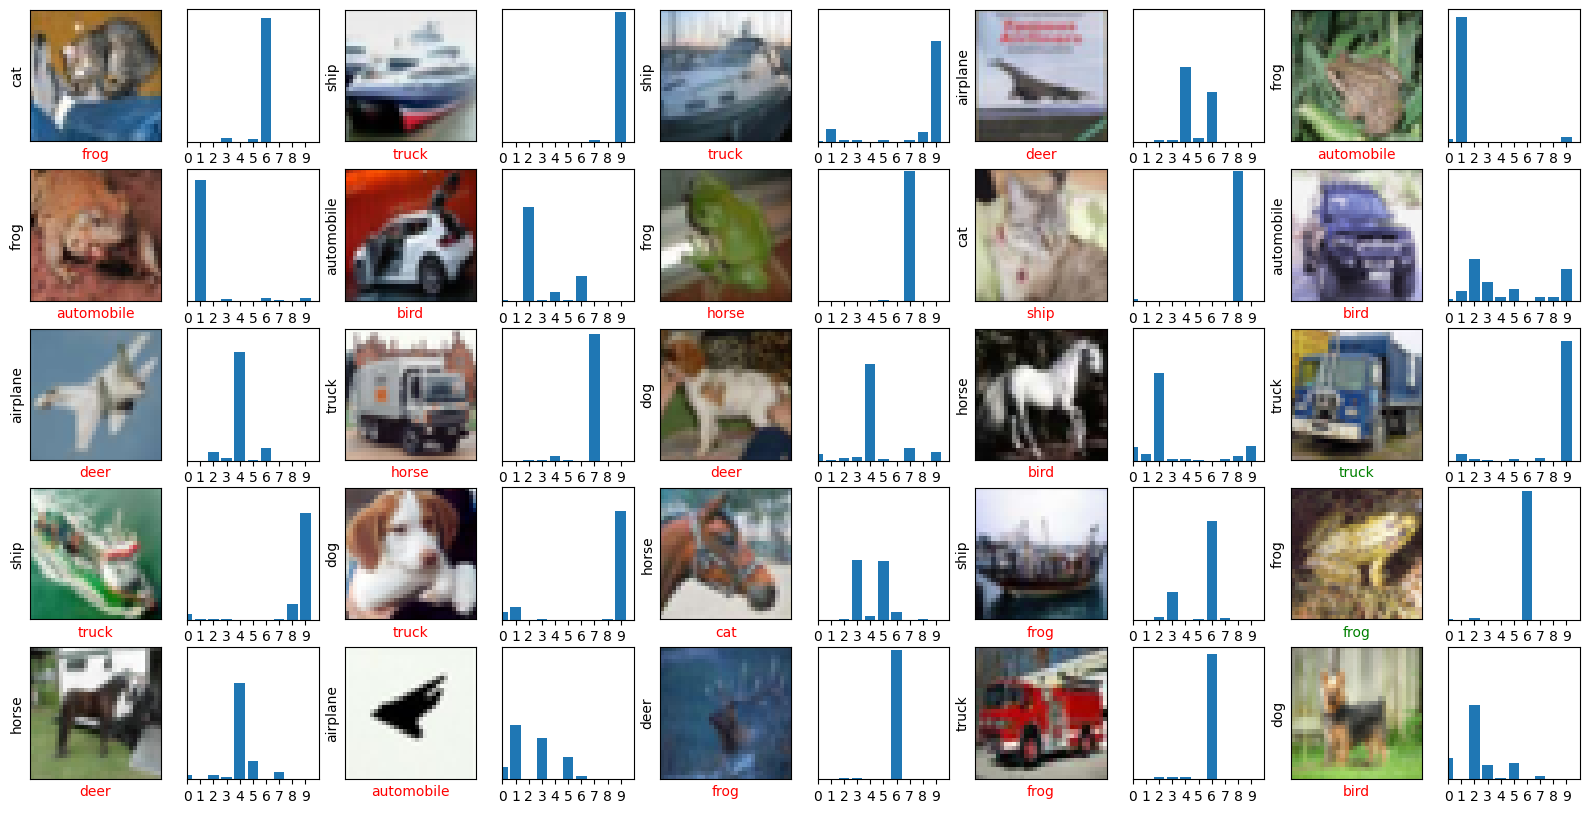

In [47]:
rows = 5
cols = 5

plt.figure(figsize=(20,10))
for i in range(25):

    plt.subplot(rows, 2*cols, 2*i+1)
    plt.imshow(test_img[i])
    plt.xticks([])
    plt.yticks([])
    plt.ylabel(class_names[test_labels[i][0]])
    if test_labels[i][0] == np.argmax(predictions[i]):
        plt.xlabel(class_names[np.argmax(predictions[i])], color='g')
    else:
        plt.xlabel(class_names[np.argmax(predictions[i])], color='r')


    plt.subplot(rows, 2*cols, 2*i+2)
    plt.bar(range(10), predictions[i])
    plt.yticks([])
    plt.xticks(range(0,10))
    plt.ylim([0,1])
    plt.xlim([0,10])

plt.show()

#**** SGD and Sparse-Categorical-Crossentropy

---



In [48]:
model2 = keras.Sequential([
    keras.Input(shape=(32,32,3)),

    layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu' ,padding='same'),
    layers.MaxPooling2D(pool_size=(2,2)),

    layers.Conv2D(filters=16, kernel_size=(3,3), activation='relu',padding='same'),
    layers.MaxPooling2D(pool_size=(2,2)),

    #layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu',padding='same'),
    #layers.MaxPooling2D(pool_size=(2,2)),


    layers.Flatten(),
    layers.Dense(64, activation='relu'),

    layers.Dense(10, activation='softmax')
])
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 32, 32, 32)        896       
                                                                 
 max_pooling2d_12 (MaxPooli  (None, 16, 16, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_13 (Conv2D)          (None, 16, 16, 16)        4624      
                                                                 
 max_pooling2d_13 (MaxPooli  (None, 8, 8, 16)          0         
 ng2D)                                                           
                                                                 
 flatten_6 (Flatten)         (None, 1024)              0         
                                                                 
 dense_12 (Dense)            (None, 64)               

In [49]:
model2.compile(
    optimizer='sgd',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [50]:
h2 = model2.fit(x=train_img, y=train_labels, epochs=30, validation_split=0.3, batch_size=256)

Epoch 1/30
137/137 [==============================] - 3s 14ms/step - loss: 2.2750 - accuracy: 0.1507 - val_loss: 2.2450 - val_accuracy: 0.1847
Epoch 2/30
137/137 [==============================] - 1s 9ms/step - loss: 2.2070 - accuracy: 0.2125 - val_loss: 2.1606 - val_accuracy: 0.2280
Epoch 3/30
137/137 [==============================] - 1s 8ms/step - loss: 2.1063 - accuracy: 0.2520 - val_loss: 2.0577 - val_accuracy: 0.2650
Epoch 4/30
137/137 [==============================] - 1s 8ms/step - loss: 2.0146 - accuracy: 0.2788 - val_loss: 2.0320 - val_accuracy: 0.2770
Epoch 5/30
137/137 [==============================] - 1s 8ms/step - loss: 1.9692 - accuracy: 0.2999 - val_loss: 1.9526 - val_accuracy: 0.3063
Epoch 6/30
137/137 [==============================] - 1s 10ms/step - loss: 1.9310 - accuracy: 0.3204 - val_loss: 2.0196 - val_accuracy: 0.2835
Epoch 7/30
137/137 [==============================] - 1s 10ms/step - loss: 1.8948 - accuracy: 0.3369 - val_loss: 1.9068 - val_accuracy: 0.3274
Epo

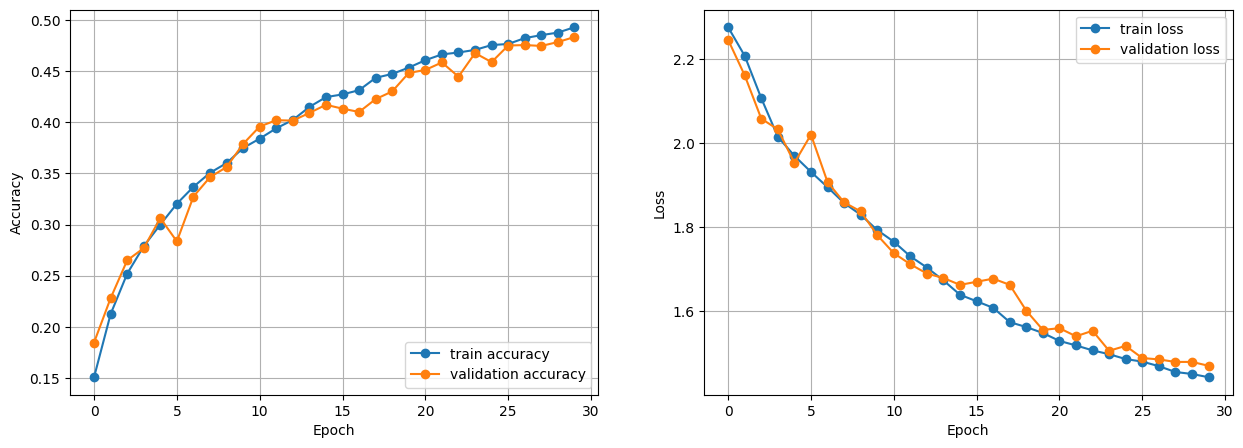

In [51]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(h2.history['accuracy'], 'o-', label='train accuracy')
plt.plot(h2.history['val_accuracy'], 'o-', label = 'validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend(loc='lower right')

plt.subplot(1,2,2)
plt.plot(h2.history['loss'], 'o-', label='train loss')
plt.plot(h2.history['val_loss'], 'o-', label='validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)
plt.legend(loc='upper right')

plt.show()

#**** rmsprop and Sparse-Categorical-Crossentropy

1.   List item
2.   List item



In [52]:
model3 = keras.Sequential([
    keras.Input(shape=(32,32,3)),

    layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu' ,padding='same'),
    layers.MaxPooling2D(pool_size=(2,2)),

    layers.Conv2D(filters=16, kernel_size=(3,3), activation='relu',padding='same'),
    layers.MaxPooling2D(pool_size=(2,2)),

    #layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu',padding='same'),
    #layers.MaxPooling2D(pool_size=(2,2)),


    layers.Flatten(),
    layers.Dense(64, activation='relu'),

    layers.Dense(10, activation='softmax')
])
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 32, 32, 32)        896       
                                                                 
 max_pooling2d_12 (MaxPooli  (None, 16, 16, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_13 (Conv2D)          (None, 16, 16, 16)        4624      
                                                                 
 max_pooling2d_13 (MaxPooli  (None, 8, 8, 16)          0         
 ng2D)                                                           
                                                                 
 flatten_6 (Flatten)         (None, 1024)              0         
                                                                 
 dense_12 (Dense)            (None, 64)               

In [53]:
model3.compile(
    optimizer='rmsprop',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [54]:
h3 = model3.fit(x=train_img, y=train_labels, epochs=30, validation_split=0.3, batch_size=256)

Epoch 1/30
137/137 [==============================] - 3s 15ms/step - loss: 1.9204 - accuracy: 0.3101 - val_loss: 1.7323 - val_accuracy: 0.3827
Epoch 2/30
137/137 [==============================] - 1s 9ms/step - loss: 1.6214 - accuracy: 0.4218 - val_loss: 1.5293 - val_accuracy: 0.4584
Epoch 3/30
137/137 [==============================] - 1s 9ms/step - loss: 1.4851 - accuracy: 0.4712 - val_loss: 1.4922 - val_accuracy: 0.4624
Epoch 4/30
137/137 [==============================] - 1s 9ms/step - loss: 1.3828 - accuracy: 0.5101 - val_loss: 1.3792 - val_accuracy: 0.5138
Epoch 5/30
137/137 [==============================] - 1s 9ms/step - loss: 1.3017 - accuracy: 0.5407 - val_loss: 1.3367 - val_accuracy: 0.5299
Epoch 6/30
137/137 [==============================] - 1s 9ms/step - loss: 1.2372 - accuracy: 0.5624 - val_loss: 1.3818 - val_accuracy: 0.5076
Epoch 7/30
137/137 [==============================] - 1s 8ms/step - loss: 1.1902 - accuracy: 0.5791 - val_loss: 1.3404 - val_accuracy: 0.5330
Epoch

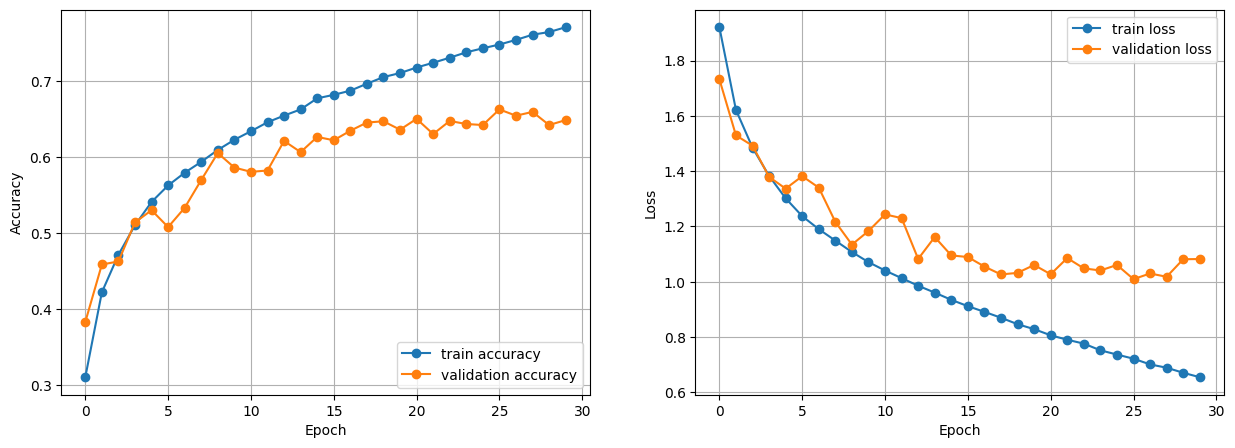

In [55]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(h3.history['accuracy'], 'o-', label='train accuracy')
plt.plot(h3.history['val_accuracy'], 'o-', label = 'validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend(loc='lower right')

plt.subplot(1,2,2)
plt.plot(h3.history['loss'], 'o-', label='train loss')
plt.plot(h3.history['val_loss'], 'o-', label='validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)
plt.legend(loc='upper right')

plt.show()

#**** rmsprop and Categorical-Crossentropy


In [56]:
model4 = keras.Sequential([
    keras.Input(shape=(32,32,3)),

    layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu' ,padding='same'),
    layers.MaxPooling2D(pool_size=(2,2)),

    layers.Conv2D(filters=16, kernel_size=(3,3), activation='relu',padding='same'),
    layers.MaxPooling2D(pool_size=(2,2)),

    #layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu',padding='same'),
    #layers.MaxPooling2D(pool_size=(2,2)),


    layers.Flatten(),
    layers.Dense(64, activation='relu'),

    layers.Dense(10, activation='softmax')
])
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 32, 32, 32)        896       
                                                                 
 max_pooling2d_12 (MaxPooli  (None, 16, 16, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_13 (Conv2D)          (None, 16, 16, 16)        4624      
                                                                 
 max_pooling2d_13 (MaxPooli  (None, 8, 8, 16)          0         
 ng2D)                                                           
                                                                 
 flatten_6 (Flatten)         (None, 1024)              0         
                                                                 
 dense_12 (Dense)            (None, 64)               

In [62]:
model4.compile(
    optimizer='rmsprop',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [63]:
h4 = model4.fit(x=train_img, y=train_labels, epochs=30, validation_split=0.3, batch_size=256)

Epoch 1/30


ValueError: ignored

In [ ]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(h4.history['accuracy'], 'o-', label='train accuracy')
plt.plot(h4.history['val_accuracy'], 'o-', label = 'validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend(loc='lower right')

plt.subplot(1,2,2)
plt.plot(h4.history['loss'], 'o-', label='train loss')
plt.plot(h4.history['val_loss'], 'o-', label='validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)
plt.legend(loc='upper right')

plt.show()

#**** SGD and :Categorical-Crossentropy

---



In [ ]:
model5 = keras.Sequential([
    keras.Input(shape=(32,32,3)),

    layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu' ,padding='same'),
    layers.MaxPooling2D(pool_size=(2,2)),

    layers.Conv2D(filters=16, kernel_size=(3,3), activation='relu',padding='same'),
    layers.MaxPooling2D(pool_size=(2,2)),

    #layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu',padding='same'),
    #layers.MaxPooling2D(pool_size=(2,2)),


    layers.Flatten(),
    layers.Dense(64, activation='relu'),

    layers.Dense(10, activation='softmax')
])
model.summary()

In [ ]:
model5.compile(
    optimizer='sgd',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [ ]:
h5 = model5.fit(x=train_img, y=train_labels, epochs=30, validation_split=0.3, batch_size=256)

In [ ]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(h5.history['accuracy'], 'o-', label='train accuracy')
plt.plot(h5.history['val_accuracy'], 'o-', label = 'validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend(loc='lower right')

plt.subplot(1,2,2)
plt.plot(h5.history['loss'], 'o-', label='train loss')
plt.plot(h5.history['val_loss'], 'o-', label='validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)
plt.legend(loc='upper right')

plt.show()

#**** adam and :Categorical-Crossentropy

---



In [ ]:
model6 = keras.Sequential([
    keras.Input(shape=(32,32,3)),

    layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu' ,padding='same'),
    layers.MaxPooling2D(pool_size=(2,2)),

    layers.Conv2D(filters=16, kernel_size=(3,3), activation='relu',padding='same'),
    layers.MaxPooling2D(pool_size=(2,2)),

    #layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu',padding='same'),
    #layers.MaxPooling2D(pool_size=(2,2)),


    layers.Flatten(),
    layers.Dense(64, activation='relu'),

    layers.Dense(10, activation='softmax')
])
model.summary()

In [ ]:
model6.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [ ]:
h6 = model6.fit(x=train_img, y=train_labels, epochs=30, validation_split=0.3, batch_size=256)

In [ ]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(h6.history['accuracy'], 'o-', label='train accuracy')
plt.plot(h6.history['val_accuracy'], 'o-', label = 'validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend(loc='lower right')

plt.subplot(1,2,2)
plt.plot(h6.history['loss'], 'o-', label='train loss')
plt.plot(h6.history['val_loss'], 'o-', label='validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)
plt.legend(loc='upper right')

plt.show()